I picked up Delhi House Price Prediction dataset from kaggle. It has 11 columns and 1259 rows and is fairly noisy



Importing necessary libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import datetime

import matplotlib

Loading the Dataset into the notebook

In [2]:
from google.colab import files
uploaded = files.upload()

Saving MagicBricks.csv to MagicBricks.csv


In [3]:
data = pd.read_csv('MagicBricks.csv')
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


Find out the number of rows and columns in the dataset

In [4]:
print(data.shape)

(1259, 11)


Finding null values

In [5]:
data.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

Get count of unique values for each column

In [6]:
for col in data:
    print(data[col].name,data[col].nunique())

Area 315
BHK 8
Bathroom 7
Furnishing 3
Locality 365
Parking 9
Price 284
Status 2
Transaction 2
Type 2
Per_Sqft 251


Dropping columns which donot much value to the model

In [7]:
data1 = data.drop(['Parking'],axis='columns')
data1

,Area,BHK,Bathroom,Furnishing,Locality,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


Dropping rows which have 'Locality' value more than 200 characters

In [8]:
data2 = data1[data1['Locality'].map(len) <= 200]
data2

,Area,BHK,Bathroom,Furnishing,Locality,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


Grouping the data based on locality. I picked up few localities which are redundant and replaced them to be called under same locality.

This helped in the decreasing the unique values of 'Locality' from 365 to 158

In [9]:
data2.loc[data2['Locality'].str.contains('Chittaranjan', case=False),'Locality'] = 'Chittaranjan Area'
data2.loc[data2['Locality'].str.contains('Roh', case=False),'Locality'] = 'Rohini Sector'
data2.loc[data2['Locality'].str.contains('Lajpat', case=False),'Locality'] = 'Lajpat Nagar'
data2.loc[data2['Locality'].str.contains('Dwaraka', case=False),'Locality'] = 'Dwaraka Sector'
data2.loc[data2['Locality'].str.contains('Budh', case=False),'Locality'] = 'Budh Vihar'
data2.loc[data2['Locality'].str.contains('Patel', case=False),'Locality'] = 'Patel Nagar'
data2.loc[data2['Locality'].str.contains('Uttam', case=False),'Locality'] = 'Uttam Nagar'
data2.loc[data2['Locality'].str.contains('Greater', case=False),'Locality'] = 'Greater kailash'
data2.loc[data2['Locality'].str.contains('New', case=False),'Locality'] = 'New Friends Colony'
data2.loc[data2['Locality'].str.contains('Shahdara', case=False),'Locality'] = 'Shahdara Area'
data2.loc[data2['Locality'].str.contains('Vasant', case=False),'Locality'] = 'Vasant Kunj'
data2.loc[data2['Locality'].str.contains('Saket', case=False),'Locality'] = 'Saket Area'
data2.loc[data2['Locality'].str.contains('Safdargunj', case=False),'Locality'] = 'Safdargunj Area'
data2.loc[data2['Locality'].str.contains('Vasundhara', case=False),'Locality'] = 'Vasundhara Enclave'
data2.loc[data2['Locality'].str.contains('Okhla', case=False),'Locality'] = 'Okhla Phase'
data2.loc[data2['Locality'].str.contains('Karol', case=False),'Locality'] = 'Karol Bagh'
data2.loc[data2['Locality'].str.contains('Kirti', case=False),'Locality'] = 'Kirti Nagar'
data2.loc[data2['Locality'].str.contains('Sheikh', case=False),'Locality'] = 'Sheikh Sarai'
data2.loc[data2['Locality'].str.contains('Punjabi', case=False),'Locality'] = 'Punjabi Bagh'
data2.loc[data2['Locality'].str.contains('Alakananda', case=False),'Locality'] = 'Alakananda Area'
data2.loc[data2['Locality'].str.contains('Kalkaji', case=False),'Locality'] = 'Kalkaji Area'
data2.loc[data2['Locality'].str.contains('Hauz', case=False),'Locality'] = 'Hauz khas Area'
data2.loc[data2['Locality'].str.contains('Chittaranjan', case=False),'Locality'] = 'Chittaranjan Area'

data2


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Area,BHK,Bathroom,Furnishing,Locality,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,Rohini Sector,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,Rohini Sector,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Area,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Area,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Area,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Area,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


Finding out the unique values after grouping values based on locality

In [10]:
for col in data2:
    print(data2[col].name,data2[col].nunique())

Area 308
BHK 8
Bathroom 7
Furnishing 3
Locality 158
Price 275
Status 2
Transaction 2
Type 2
Per_Sqft 249


Finding the count of each group based out of the locality


In [11]:
grouped = data2.groupby('Locality')
count = list(grouped.size())
grp = list(grouped.groups)
print(count)
print(grp)

[6, 3, 20, 3, 4, 1, 1, 5, 2, 3, 1, 1, 1, 3, 1, 1, 1, 17, 1, 1, 17, 8, 26, 2, 15, 7, 1, 3, 1, 2, 2, 1, 3, 19, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 3, 2, 16, 5, 1, 4, 1, 1, 2, 5, 2, 8, 1, 42, 2, 3, 2, 1, 29, 1, 3, 1, 2, 2, 1, 29, 30, 1, 2, 2, 1, 1, 2, 3, 1, 1, 89, 2, 25, 4, 10, 15, 2, 13, 4, 1, 24, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 10, 2, 1, 1, 1, 72, 6, 34, 1, 1, 7, 1, 1, 2, 3, 36, 2, 6, 2, 2, 30, 2, 1, 2, 1, 73, 2, 1, 18, 1, 30, 1, 1, 1, 1, 72, 30, 4, 4, 1, 1, 3, 2, 1, 7, 4, 1, 3, 1, 2, 3, 25, 34, 27, 1, 3, 2]
['Aashirwaad Chowk, Dwarka', 'Adarsh Homes, Dwarka Mor', 'Alaknanda', 'Andheria Mor, Mehrauli', 'Aravali Apartments, Alaknanda', 'Aravali Tower, Chhattarpur', 'Archana Apartment, Paschim Vihar', 'Arjun Nagar, Safdarjung Enclave', 'Ashirwad Apartments, Dwarka', 'Ashirwad Apartments, Dwarka Sector 12', 'Ashoka Apartment, Paschim Vihar Block A2', 'Ashoka Apartments, Dwarka Sector 12', 'Ashoka Enclave Apartment, Dwarka Sector 11', 'Bank Apartments, Aashirwaad Chowk, Dwarka', 'Bank Enclave, Laxm

In the area, I grouped all the values of area based on a range. Replaced values with 'Area' between 100 - 1000 sqft as 1, 1001 - 2000 sqft as 2 and so on..


In [17]:
area = data2['Area'].unique()
# print(area)
for a in area:
  if(a >= 100 and a <= 1000):
    data2['Area'] = data2['Area'].replace(a, 1)
  if(a >=1001 and a <=2000):
    data2['Area'] = data2['Area'].replace(a, 2)
  if(a >=2001 and a <=3000):
    data2['Area'] = data2['Area'].replace(a, 3)
  if(a >=3001 and a <=4000):
    data2['Area'] = data2['Area'].replace(a, 4)
  if(a >=4001 and a <=5000):
    data2['Area'] = data2['Area'].replace(a, 5)
  if(a >=5001 and a <= 6000):
    data2['Area'] = data2['Area'].replace(a, 6)
  if(a >=6001 and a <= 7000):
    data2['Area'] = data2['Area'].replace(a, 7)
  if(a >=7001):
    data2['Area'] = data2['Area'].replace(a, 8)
data2


,Area,BHK,Bathroom,Furnishing,Locality,Price,Status,Transaction,Type,Per_Sqft
0,1.0,3,2.0,Semi-Furnished,Rohini Sector,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,1.0,2,2.0,Semi-Furnished,Rohini Sector,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,1.0,2,2.0,Furnished,Rohini Sector,15500000,Ready_to_move,Resale,Apartment,6667.0
3,1.0,2,2.0,Semi-Furnished,Rohini Sector,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
5,2.0,4,3.0,Semi-Furnished,Rohini Sector,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,5.0,4,5.0,Unfurnished,Chittaranjan Area,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,2.0,3,2.0,Semi-Furnished,Chittaranjan Area,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,1.0,3,3.0,Semi-Furnished,Chittaranjan Area,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,1.0,2,2.0,Unfurnished,Chittaranjan Area,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


Finding the count of each group based out of the Area


In [18]:
grouped = data2.groupby('Area')
count = list(grouped.size())
grp = list(grouped.groups)
print(count)
print(grp)

[494, 502, 130, 25, 22, 20, 1, 1, 2, 4, 1, 1, 1, 1, 2, 1]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 28.0, 35.0, 45.0, 50.0, 58.0, 61.0, 65.0, 66.0, 70.0, 75.0]


Plotting Dataset

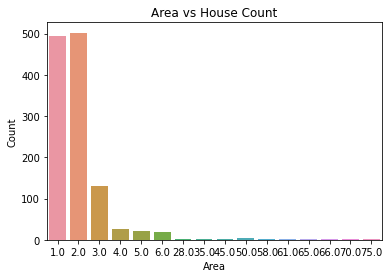

In [19]:
import seaborn as sns
sns.barplot(x=grp, y = count)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Area vs House Count')
plt.show()

In [21]:
data2.dropna(axis=1, thresh=int(len(data2)*0.6),inplace=True)
data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Area,BHK,Bathroom,Furnishing,Locality,Price,Status,Transaction,Type,Per_Sqft
0,1.0,3,2.0,Semi-Furnished,Rohini Sector,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,1.0,2,2.0,Semi-Furnished,Rohini Sector,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,1.0,2,2.0,Furnished,Rohini Sector,15500000,Ready_to_move,Resale,Apartment,6667.0
3,1.0,2,2.0,Semi-Furnished,Rohini Sector,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
5,2.0,4,3.0,Semi-Furnished,Rohini Sector,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...
1254,5.0,4,5.0,Unfurnished,Chittaranjan Area,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,2.0,3,2.0,Semi-Furnished,Chittaranjan Area,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,1.0,3,3.0,Semi-Furnished,Chittaranjan Area,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,1.0,2,2.0,Unfurnished,Chittaranjan Area,11500000,Ready_to_move,Resale,Builder_Floor,12916.0
